In [1]:
import xarray as xr
from dask.distributed import Client
import time
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import sys
import gc
import numpy as np
sys.setrecursionlimit(100000)

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as colors
from matplotlib import path
import scipy.io as sio
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import seaborn as sns
import cmaps
import seapy

In [116]:
dates_ref = range(15461,15884,3)
dates_dtfmt = np.array([ dt.timedelta(itime) + dt.datetime(1970,1,1) for itime in dates_ref])
list(dates_ref)
inner = 20

In [111]:

#define your observation, forward simulation and da simulation root path

mydaroot = '/Volumes/LC_1/roms4dvar_ecs/i4dvar_outputs/'
mod_prefix = "STORAGE/mod/ocean_ecs_mod_"
grd_file = '/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/workspace_geopolarsst/STORAGE/prior/ocean_ecs_fwd_15461_outer0.nc'
#define your workspace 
da_workspace = {}
data_len = {}
J_ini = {}
J_fnl = {}
J_nl = {}
N_obs = {}

da_workspace['sst'] = 'workspace_sstbgqc/'
da_workspace['all'] = 'workspace_withcruise/'
for iexp in ['sst','all']:
    
    J_ini[iexp] = np.zeros([len(dates_ref)])
    J_fnl[iexp] = np.zeros([len(dates_ref)])
    J_nl[iexp] = np.zeros([len(dates_ref)])
    N_obs[iexp] = np.zeros([len(dates_ref)])
    
    




#since this is a vertical profile validation, full fwd file is needed


In [40]:
needed_field = ['TL_costfuncion', 
                'back_function',
                'NLcost_function'
               'obs_scale']


                

In [113]:
# loading poseterior sst

for iexp in ['sst','all']:
    for iwindow, idate in enumerate(dates_ref):
        print(idate)
        dafile_thiswindow = mydaroot+da_workspace[iexp]+mod_prefix+str(idate)+'.nc'
        
        ds_thiswindow = xr.open_dataset(dafile_thiswindow,
                                     engine='netcdf4',                          
                                    )
        J_ini[iexp][iwindow] = ds_thiswindow.TLcost_function.data[0] + ds_thiswindow.back_function.data[-1]
        J_fnl[iexp][iwindow] = ds_thiswindow.TLcost_function.data[-1] + ds_thiswindow.back_function.data[-1]
        J_nl[iexp][iwindow] = ds_thiswindow.NLcost_function.data[-1,0]
        N_obs[iexp][iwindow] = len(np.nonzero(ds_thiswindow.obs_scale.data)[0])
        

15461
15464
15467
15470
15473
15476
15479
15482
15485
15488
15491
15494
15497
15500
15503
15506
15509
15512
15515
15518
15521
15524
15527
15530
15533
15536
15539
15542
15545
15548
15551
15554
15557
15560
15563
15566
15569
15572
15575
15578
15581
15584
15587
15590
15593
15596
15599
15602
15605
15608
15611
15614
15617
15620
15623
15626
15629
15632
15635
15638
15641
15644
15647
15650
15653
15656
15659
15662
15665
15668
15671
15674
15677
15680
15683
15686
15689
15692
15695
15698
15701
15704
15707
15710
15713
15716
15719
15722
15725
15728
15731
15734
15737
15740
15743
15746
15749
15752
15755
15758
15761
15764
15767
15770
15773
15776
15779
15782
15785
15788
15791
15794
15797
15800
15803
15806
15809
15812
15815
15818
15821
15824
15827
15830
15833
15836
15839
15842
15845
15848
15851
15854
15857
15860
15863
15866
15869
15872
15875
15878
15881
15461
15464
15467
15470
15473
15476
15479
15482
15485
15488
15491
15494
15497
15500
15503
15506
15509
15512
15515
15518
15521
15524
15527
15530
15533
1553

In [109]:
ds_thiswindow

<xarray.Dataset>
Dimensions:                 (survey: 1814, state_var: 7, Ninner: 20, Nouter: 1,
                             Ninner+1: 21, three: 3, datum: 14059452,
                             Nouter+1: 2, cost_var: 8, iteration: 21)
Dimensions without coordinates: survey, state_var, Ninner, Nouter, Ninner+1,
                                three, datum, Nouter+1, cost_var, iteration
Data variables: (12/56)
    outer                   int32 ...
    inner                   int32 ...
    Nobs                    (survey) int32 ...
    Nused_obs               (state_var) int32 ...
    obs_mean                (state_var) float64 ...
    obs_std                 (state_var) float64 ...
    ...                      ...
    misfit_initial          (datum) float64 ...
    misfit_final            (datum) float64 ...
    NLcost_function         (Nouter+1, cost_var) float64 1.959e+05 0.0 ... 0.0
    TLcost_function         (iteration) float64 1.959e+05 ... 5.959e+04
    back_function           (iteration) float64 0.0 2.307 6.202 ... 357.9 388.3
    Jmin                    (iteration) float64 ...
Attributes: (12/19)
    type:              ROMS/TOMS 4D-Var output observation processing file
    Algorithm:         I4DVAR
    str_day:           15479.5
    end_day:           15482.5
    str_date:          2012-05-19 12:00:00.00
    end_date:          2012-05-22 12:00:00.00
    ...                ...
    os:                Linux
    cpu:               x86_64
    compiler_system:   gfortran
    compiler_command:  /gpfshddpool/home/rongzengrui/soft/openmpi-4.1.5-aocc/...
    compiler_flags:    -frepack-arrays -O3 -ffast-math -
    history:           ROMS/TOMS, Version 4.1, Tuesday - January 14, 2025 -  ...

In [179]:
dates_dtfmt

array([datetime.datetime(2012, 5, 1, 0, 0),
       datetime.datetime(2012, 5, 4, 0, 0),
       datetime.datetime(2012, 5, 7, 0, 0),
       datetime.datetime(2012, 5, 10, 0, 0),
       datetime.datetime(2012, 5, 13, 0, 0),
       datetime.datetime(2012, 5, 16, 0, 0),
       datetime.datetime(2012, 5, 19, 0, 0),
       datetime.datetime(2012, 5, 22, 0, 0),
       datetime.datetime(2012, 5, 25, 0, 0),
       datetime.datetime(2012, 5, 28, 0, 0),
       datetime.datetime(2012, 5, 31, 0, 0),
       datetime.datetime(2012, 6, 3, 0, 0),
       datetime.datetime(2012, 6, 6, 0, 0),
       datetime.datetime(2012, 6, 9, 0, 0),
       datetime.datetime(2012, 6, 12, 0, 0),
       datetime.datetime(2012, 6, 15, 0, 0),
       datetime.datetime(2012, 6, 18, 0, 0),
       datetime.datetime(2012, 6, 21, 0, 0),
       datetime.datetime(2012, 6, 24, 0, 0),
       datetime.datetime(2012, 6, 27, 0, 0),
       datetime.datetime(2012, 6, 30, 0, 0),
       datetime.datetime(2012, 7, 3, 0, 0),
       datetime.d

In [37]:
np.nonzero(xr.open_dataset(mydaroot+da_workspace[iexp]+mod_prefix+str(dates_ref[0])+'.nc',
                                     engine='netcdf4',                          
                                    )['innovation'].data)

(array([     0,      1,      2, ..., 132205, 132206, 132207]),)

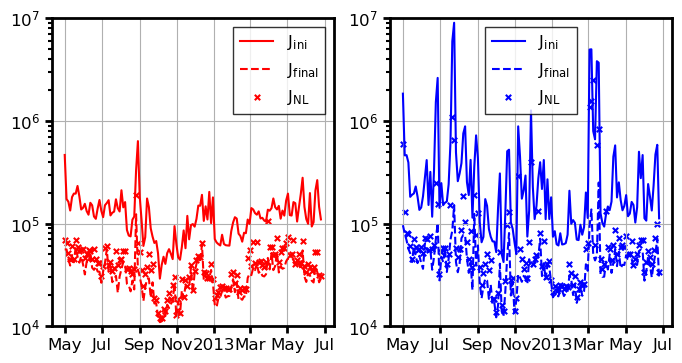

In [201]:
import matplotlib.dates as mdates
line_color = {'sst':'r',
              'all':'b',
}
fig, axs = plt.subplots(1,2,figsize = (8,4))

for i,iexp in enumerate(['sst','all']):
    for bnd in ax.spines.keys():
        axs[i].spines[bnd].set_linewidth('2')
    axs[i].set_yscale('log')
    axs[i].plot(dates_dtfmt,J_ini[iexp],color=line_color[iexp],linestyle='-',label='$\mathsf{J_{ini}}$')
    axs[i].plot(dates_dtfmt,J_fnl[iexp],color=line_color[iexp],linestyle='--',label='$\mathsf{J_{final}}$')
    # axs[i].plot(dates_dtfmt,N_obs[iexp]/2,color='k',)
    axs[i].scatter(dates_dtfmt,J_nl[iexp],15,color=line_color[iexp],marker='x',label='$\mathsf{J_{NL}}$')
    
    axs[i].set_ylim([1e4,1e7])
    # axs[i].set_xlim(
    axs[i].tick_params(direction = 'out',width =2,length=5, labelsize = 12,top = 0, right = 0,)
    axs[i].tick_params(axis='y',which ='minor',direction = 'out',width =1.5,length=3, labelsize = 12,top = 0, right = 0,)
    axs[i].xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(axs[i].xaxis.get_major_locator()))
    # axs[i].xaxis.set_minor_locator(mdates.MonthLocator())
    axs[i].grid(True)
    axs[i].legend(fancybox=False,fontsize = 12,edgecolor='k')